In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intra Knowledge QnA

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intra_knowledge_qna.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fretrieval-augmented-generation%2Fintra_knowledge_qna.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/intra_knowledge_qna.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intra_knowledge_qna.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

|                                            |                                                         |
|--------------------------------------------|---------------------------------------------------------|
|Author(s)                                   |                                                         |
|[Tanya Warrier](https://github.com/tanyarw) |[Samriddhi Mishra](https://github.com/samriddhimishra07) |
|[Neelay Shah](https://github.com/neelay21)  | [Kumar Saurabh](https://github.com/kusaurabh24)         |

## Overview

- **Gemini:** [Gemini](https://ai.google.dev/models/gemini) is a family of generative AI models that lets developers generate content and solve problems. These models are designed and trained to handle both text and images as input.
  - **Gemini 1.0 Pro model (gemini-1.0-pro):** Designed to handle natural language tasks, multi-turn text and code chat, and code generation.

- **LangChain:** [LangChain](https://www.langchain.com/) is a framework designed to make integration of Large Language Models (LLM) like Gemini easier for applications.

- **Chroma DB:** [Chroma](https://python.langchain.com/docs/integrations/vectorstores/chroma) is the open-source embedding database. Chroma makes it easy to build LLM apps by making knowledge, facts, and skills pluggable for LLMs.

- **Vertex AI Embeddings for Text:** With [textembedding-gecko](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/text-embeddings) models we can easily create a text embedding with LLM. *textembedding-gecko@003* is the newest stable embedding model.


For more information, see the [Generative AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) on Vertex AI documentation.


### Objectives

This notebook leverages Google Vertex AI's Generative capabilities to parse multiple PDF documents, offering Question & Answering functionality by cross-referencing the provided documents.  Additionally, it assists in identification of relevant answer sections within the provided documents.

This notebook uses [Langchain](https://python.langchain.com/docs/get_started/introduction.html) to operationalize workflows for Question & Answer capabilities, and it utilizes [Chroma DB](https://python.langchain.com/docs/integrations/vectorstores/chroma) to persist document embeddings for similarity searches.


### Architecture outlining the workflow approach

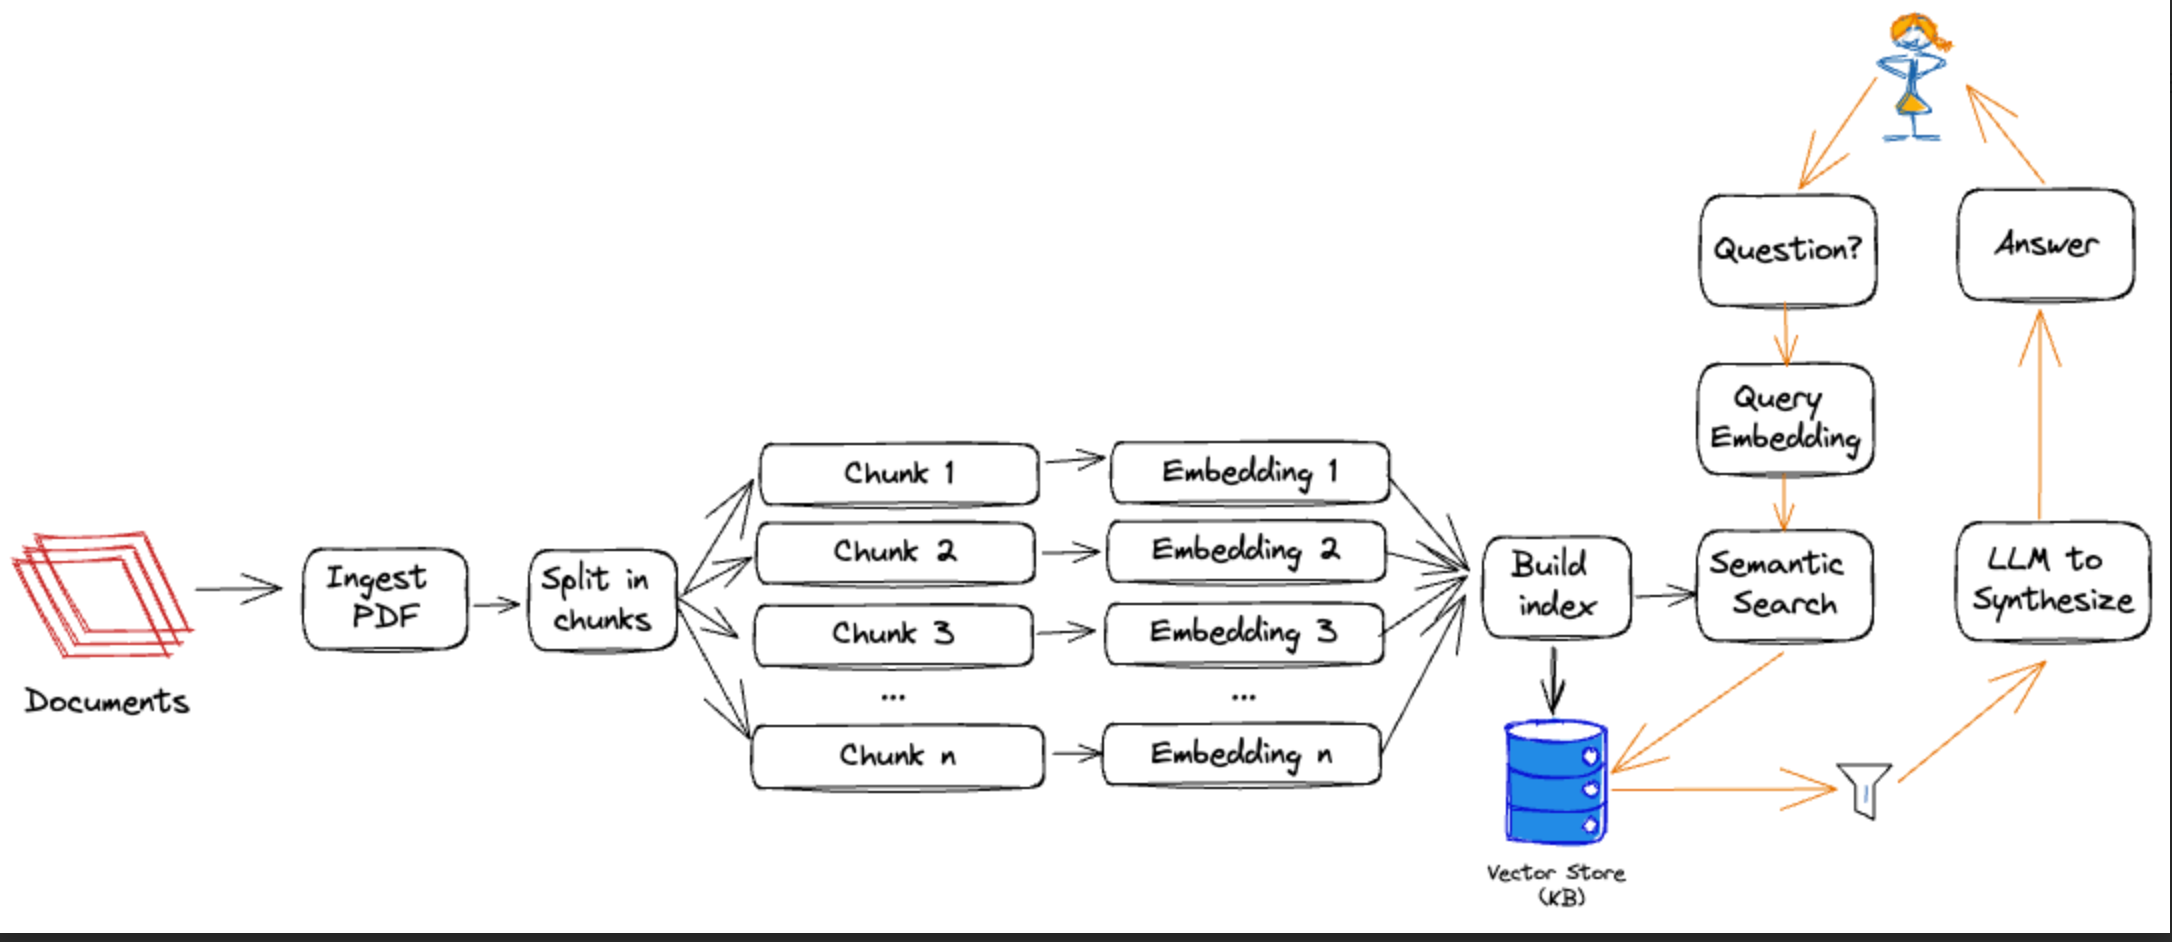

## Getting Started


### Install Vertex AI SDK and other required packages

Install LangChain's Python library, `langchain`, LangChain's integration package for Google Vertex AI, `langchain_google_vertexai`, Chroma for persisting embeddings, `chromadb` and other required packages.

In [ ]:
!apt-get install poppler-utils \
tesseract-ocr -y

!pip install google-cloud-aiplatform==1.46.0 \
'bigframes<1.0.0' \
langchain==0.1.14 \
langchain_google_vertexai==0.1.2 \
chromadb==0.4.24 \
unstructured==0.12.6 \
pillow-heif==0.15.0 \
unstructured-inference==0.7.25 \
pypdf==4.1.0 \
pdf2image==1.17.0 \
unstructured_pytesseract==0.3.12 \
pikepdf==8.14.0 \
--upgrade \
--user --quiet

### Restart runtime (Colab only)

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)


If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
PROJECT_ID = "your-project-id"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Variables

Create variables to store the folder location of all the pdf documents needed to be indexed. Also, the location to store the embedding database for the documents.

In [ ]:
INDEX_PATH = "./Dataset/"
PERSIST_PATH = "./PersistentDB/"

TEXT_MODEL = "gemini-1.0-pro"
EMBEDDING_MODEL = "textembedding-gecko@003"

### Import Libraries


In [ ]:
# Utils
import os
import time
from typing import List

# Langchain
import langchain
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.document_loaders import TextLoader, UnstructuredPDFLoader
from langchain.prompts import PromptTemplate
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores.chroma import Chroma
from langchain_google_vertexai import VertexAI, VertexAIEmbeddings

print(f"LangChain version: {langchain.__version__}")

# Vertex AI
from google.cloud import aiplatform

print(f"Vertex AI SDK version: {aiplatform.__version__}")

# HTML Widgets
import ipywidgets as widgets
from IPython.display import clear_output

### Data Preparation

We will be using the public [Internal Revenue Service(IRS) document](https://www.irs.gov/pub/irs-pdf/p554.pdf) which states the details for each section of tax eligibility for seniors in the USA. It consists of 37 pages.

This document serves as the input PDF for generating and indexing embeddings, querying the model, and facilitating Question and Answer scenarios based on the data corpus.

In [ ]:
# Create the folder for input files
!mkdir -p $INDEX_PATH

# Download the files
!wget https://www.irs.gov/pub/irs-pdf/p554.pdf -P $INDEX_PATH

### Define utility functions

**Document Loading:** Read in the content of the documents from the provided directory.

**Document Splitting:**
Creates a CharacterTextSplitter object with parameters:
- `chunk_size=8192`: Aiming for text chunks of around 8192 characters.
- `chunk_overlap=128:` A small overlap between chunks, likely to preserve context when documents are split.

Applies the *text_splitter* to the loaded documents, breaking them into smaller, more manageable text chunks.

Gathers all the split text chunks into a single list and return for furter processing.

In [ ]:
def get_split_documents(index_path: str) -> List[str]:
    """
    This function is used to chunk documents and convert them into a list.

    Args:
    index_path: Path of the dataset folder containing the documents.

    Returns:
    List of chunked, or split documents.
    """

    split_docs = []

    for file_name in os.listdir(index_path):
        print(f"file_name : {file_name}")
        if file_name.endswith(".pdf"):
            loader = UnstructuredPDFLoader(index_path + file_name)
        else:
            loader = TextLoader(index_path + file_name)

        text_splitter = CharacterTextSplitter(chunk_size=8192, chunk_overlap=128)
        split_docs.extend(text_splitter.split_documents(loader.load()))

    return split_docs

### Create Vector Database

Instantiate a VertexAIEmbeddings embedding object that will efficiently generate text embeddings using the specified `textembedding-gecko@003` model.

In [ ]:
# Custom VertexAI Embeddings object
EMBEDDING_NUM_BATCH = 5

embeddings = VertexAIEmbeddings(
    model_name=EMBEDDING_MODEL, batch_size=EMBEDDING_NUM_BATCH
)

**Load Documents:** `get_split_documents` function retrieves and preprocesses documents from the specified `INDEX_PATH`.

**Generate Embeddings:** The code generates vector embeddings

**Create Vector Database:**  A Chroma vector database (db) is initialized. This specialized database is designed for storing and efficiently searching vector embeddings.

**Persist Database:** The `db.persist()` command saves the newly created vector database to disk at the location defined by `PERSIST_PATH` environment variable.

In [ ]:
# Load documents, generate vectors and store in Vector database
split_docs = get_split_documents(INDEX_PATH)

db = Chroma.from_documents(
    documents=split_docs, embedding=embeddings, persist_directory=PERSIST_PATH
)
db.persist()  # Ensure DB persist

### Create the Retriever

Load the `gemini-1.0-pro` generative model with parameters.

In [ ]:
#  Initializing the Vertex Language model with required parameters
llm = VertexAI(
    model=TEXT_MODEL,
    max_output_tokens=2048,
    temperature=0.2,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

Creates a retriever utilizing the Chroma vector store for similarity search.

`search_kwargs={"k": 3}` - This parameter, specific to similarity search, dictates that the retriever should return the top 3 most relevant documents based on the calculated similarity scores.


In [ ]:
# Expose index to the retriever
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 3})

Define a prompt template for a language model that consists of a string template. It accepts a set of parameters from the user that can be used to generate a prompt for a language model.

More on [PromptTemplate](https://api.python.langchain.com/en/latest/prompts/langchain_core.prompts.prompt.PromptTemplate.html).

In [ ]:
template = """
You are a helpful AI assistant. You're tasked to answer the question given below, but only based on the context provided.
context:
<context>
{context}
</context>

question:
<question>
{input}
</question>

If you cannot find an answer ask the user to rephrase the question.
answer:

"""
prompt = PromptTemplate.from_template(template)

Create the retrieval chain and invoke it by passing the question as an input.

In [ ]:
# Create the retrieval chain
combine_docs_chain = create_stuff_documents_chain(llm, prompt)
retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

In [ ]:
# Invoke the retrieval chain
response = retrieval_chain.invoke({"input": "Tell me about Figuring the EIC."})

In [ ]:
print(response["answer"])

### Example Questions:

- Special rules for joint returns.
- Tell about persons not eligible for the standard deduction.
- Tell me about Figuring the EIC.
- Tell about contributions to Kay Bailey Hutchison Spousal IRAs.
- Tell about standard deduction for dependents.


## Interactive UI Widget for Question-Answering

Enter your question in the input box and choose one of the options:

**Ask Me!:** This option will generate an answer using similarity search on vector embeddings.

**More Details:** Select this option to input the generated answer into a Large Language Model (LLM) for a more elaborate response.

In [ ]:
button = widgets.Button(description="Ask Me!")
output = widgets.Output()
button_stp = widgets.Button(description="More details")
output = widgets.Output()
text = widgets.Text(
    description="Question:", layout=widgets.Layout(width="80%", height="50px")
)
display(text, button, button_stp, output)


@output.capture()
def on_button_clicked(b):
    clear_output()
    question = text.value

    result = retrieval_chain.invoke({"input": question})
    source_documents = list({doc.metadata["source"] for doc in result["context"]})

    print("\nAnswer-", result["answer"])
    print("\nSource-", "\n".join(source_documents))
    print("\n")


@output.capture()
def on_stp_clicked(b):
    clear_output()
    question = text.value
    query = question + "Give detailed information as much as possible. "
    result = retrieval_chain.invoke({"input": query})
    source_documents = list({doc.metadata["source"] for doc in result["context"]})

    print("\nAnswer-", result["answer"])
    print("\nSource-", "\n".join(source_documents))
    print("\n")


button.on_click(on_button_clicked)
button_stp.on_click(on_stp_clicked)

## Cleaning up

Remove all the downloaded files and the vector database

In [ ]:
!rm -r $INDEX_PATH
!rm -r $PERSIST_PATH